/srv/home/xihua/Key_Product_Metrics
Generating Net New Content chart...


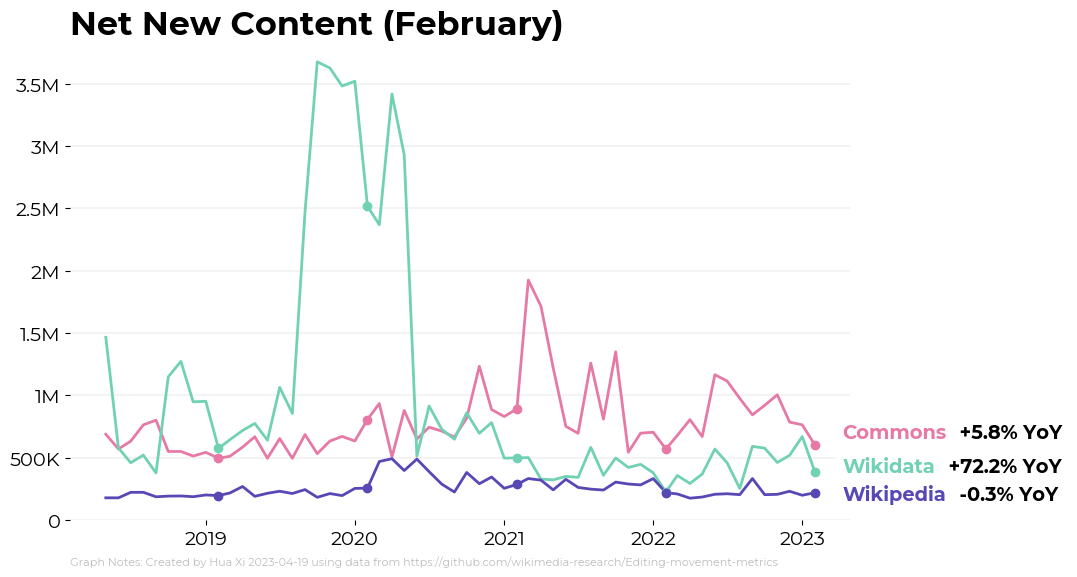

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager
import os
%cd ..
%run wikicharts.ipynb

def main():
    print("Generating Net New Content chart...")

    #---SET PARAMETERS---
    #get current path
    home_dir = os.getcwd()
    outfile_name = "Net_New.png"
    yoy_note = " "
    display_flag = False
    save_file_name = home_dir + "/charts/" + outfile_name

    #---CLEAN DATA--
    #read in data
    df = pd.read_csv(home_dir + '/resources/data/editor_metrics.tsv', sep='\t')
    
    start_date = "2018-05-01"
    end_date = datetime.datetime.today()

    #convert string to datetime
    df['month'] = pd.to_datetime(df['month'])

    #truncate to preferred date range
    df = df[df["month"].isin(pd.date_range(start_date, end_date))]
    

    #---PREPARE TO PLOT
    key = pd.DataFrame([['Commons',wmf_colors['pink']],
        ['Wikidata',wmf_colors['brightgreen']],
        ['Wikipedia',wmf_colors['purple']]],
        index=['net_new_Commons_content_pages','net_new_Wikidata_entities','net_new_Wikipedia_articles'],
        columns=['labelname','color'])

    #---MAKE CHART---
    chart = Wikichart(start_date,end_date,df)
    chart.init_plot(width=12)
    chart.plot_line('month','net_new_Commons_content_pages',key.loc['net_new_Commons_content_pages','color'])
    chart.plot_line('month','net_new_Wikidata_entities',key.loc['net_new_Wikidata_entities','color'])
    chart.plot_line('month','net_new_Wikipedia_articles',key.loc['net_new_Wikipedia_articles','color'])

    chart.plot_monthlyscatter('month','net_new_Commons_content_pages',key.loc['net_new_Commons_content_pages','color'])
    chart.plot_monthlyscatter('month','net_new_Wikidata_entities',key.loc['net_new_Wikidata_entities','color'])
    chart.plot_monthlyscatter('month','net_new_Wikipedia_articles',key.loc['net_new_Wikipedia_articles','color'])

    chart.format(title = f'Net New Content',
        radjust=0.75,
        data_source="https://github.com/wikimedia-research/Editing-movement-metrics")

    #labeling is done together in order to calculate correct spacing to prevent label overlap whereas the lines can be plotted separately
    chart.multi_yoy_annotate(['net_new_Commons_content_pages','net_new_Wikidata_entities','net_new_Wikipedia_articles'],key,chart.calc_yoy, xpad=0)

    chart.finalize_plot(save_file_name,display=display_flag)

if __name__ == "__main__":
    main()